In [1]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [6]:
y_scores = model.predict_proba(X_test)[:,1]
y_scores

array([0.0495376 , 0.17459071, 0.09362513, 0.2551022 , 0.63549763,
       0.11671255, 0.06567149, 0.42191788, 0.04865943, 0.57564545,
       0.33874537, 0.41301962, 0.69855052, 0.19964051, 0.02001651,
       0.82469077, 0.86657545, 0.03101256, 0.25510051, 0.89492636,
       0.95245335, 0.83477975, 0.11740834, 0.44670755, 0.08923396,
       0.0688207 , 0.65116518, 0.41197506, 0.17861729, 0.28689366,
       0.24548703, 0.43901236, 0.00942506, 0.24259232, 0.35169128,
       0.96164473, 0.34359585, 0.80923856, 0.29380795, 0.05083306,
       0.1818489 , 0.08672337, 0.42228328, 0.18738343, 0.03011727,
       0.0394937 , 0.24741239, 0.42782187, 0.10529443, 0.37970895,
       0.99355865, 0.10667889, 0.39101596, 0.7688143 , 0.36866148,
       0.45774882, 0.95035341, 0.41991928, 0.39156094, 0.04376209,
       0.37293033, 0.901279  , 0.88176163, 0.88842918, 0.33084351,
       0.0693201 , 0.95264199, 0.20055758, 0.26055491, 0.35462971,
       0.10359055, 0.08168641, 0.45044035, 0.09221339, 0.08648

In [8]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

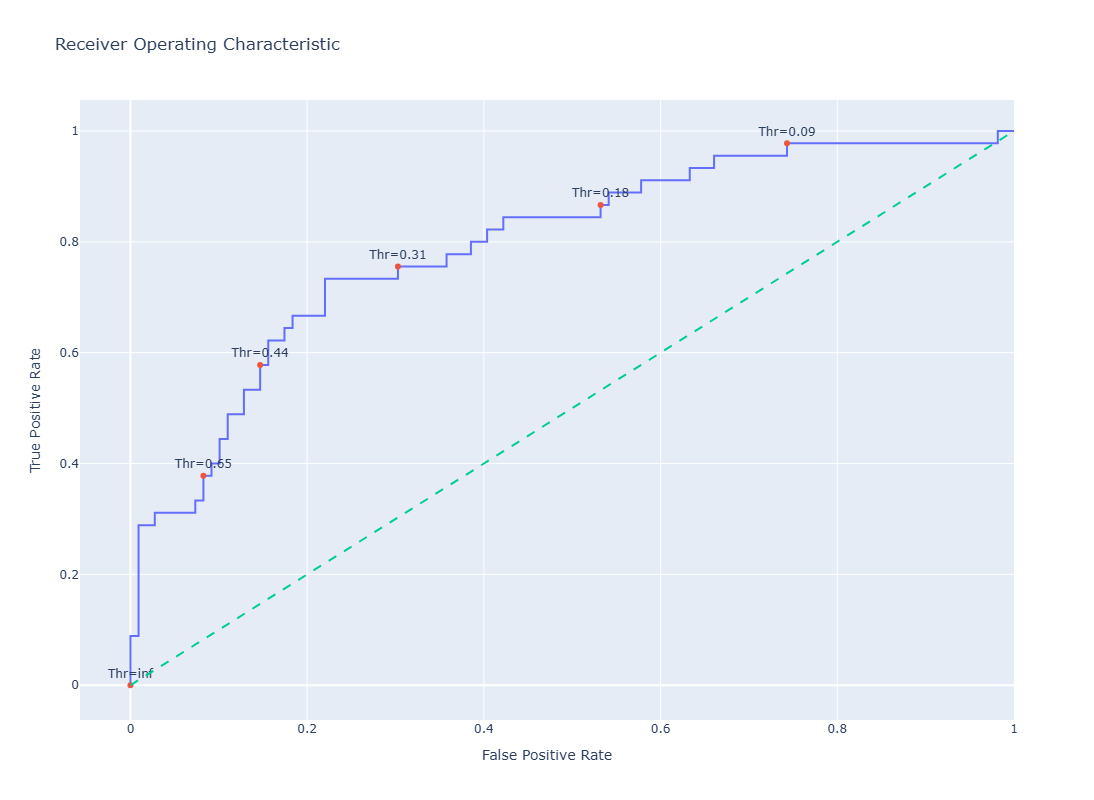

In [11]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

In [12]:
# finding best thresold
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)  # fnding the index of max diff
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.3686614815032027


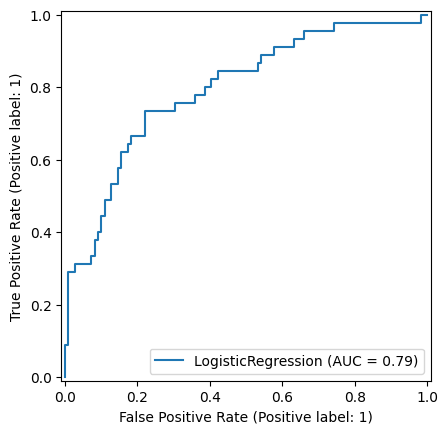

In [13]:
# another way to displa roccurve

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)

Text(0.5, 1.0, 'ROC Curve')

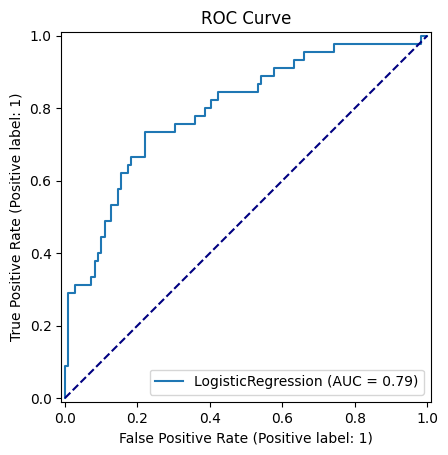

In [14]:
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # Add diagonal random guess line
plt.title("ROC Curve")

Best Threshold: 0.3686614815032027
TPR at Best Threshold: 0.7333333333333333
FPR at Best Threshold: 0.22018348623853212


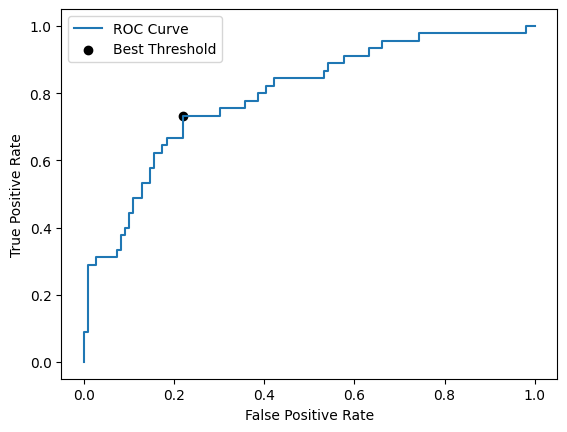

In [15]:
J = tpr - fpr
ix = np.argmax(J)  # Find the index of the maximum J
best_thresh = thresholds[ix]

print(f"Best Threshold: {best_thresh}")
print(f"TPR at Best Threshold: {tpr[ix]}")
print(f"FPR at Best Threshold: {fpr[ix]}")

# 4. Plotting the result
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold') # The dot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()